# Abalone Case Study

Problem Statement:
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

Attribute Information

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 

Name / Data Type / Measurement Unit / Description
-----------------------------
Sex / nominal / -- / M, F, and I (infant)

Length / continuous / mm / Longest shell measurement

Diameter / continuous / mm / perpendicular to length

Height / continuous / mm / with meat in shell

Whole weight / continuous / grams / whole abalone

Shucked weight / continuous / grams / weight of meat

Viscera weight / continuous / grams / gut weight (after bleeding)

Shell weight / continuous / grams / after being dried

Rings / integer / -- / +1.5 gives the age in years. 

You have to predict the rings of each abalone which will lead us to the age of that abalone. 

Downlaod Files:
https://github.com/dsrscientist/dataset1/blob/master/abalone.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as spstats

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv")
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [4]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [5]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [6]:
df.nunique()

Sex                  3
Length             134
Diameter           111
Height              51
Whole weight      2429
Shucked weight    1515
Viscera weight     880
Shell weight       926
Rings               28
dtype: int64

In [7]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [8]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


# EDA (Exploratory Data Analysis)

M    1528
I    1342
F    1307
Name: Sex, dtype: int64


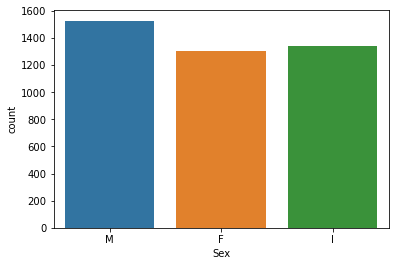

In [9]:
import seaborn as sns
ax=sns.countplot(x="Sex",data=df)
print(df["Sex"].value_counts())

In [10]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='Diameter', ylabel='Density'>

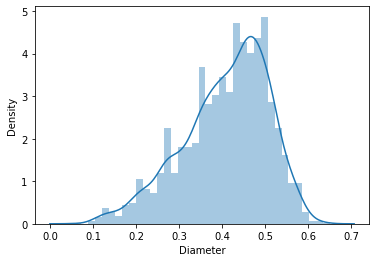

In [11]:
sns.distplot(df['Diameter'])

<AxesSubplot:xlabel='Shell weight', ylabel='Density'>

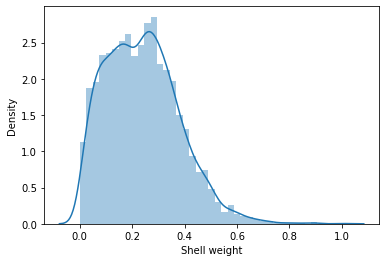

In [12]:
sns.distplot(df['Shell weight'])

<AxesSubplot:xlabel='Height', ylabel='Count'>

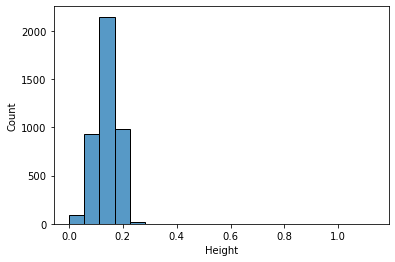

In [13]:
sns.histplot(df['Height'],bins=20)

<AxesSubplot:xlabel='Rings', ylabel='Count'>

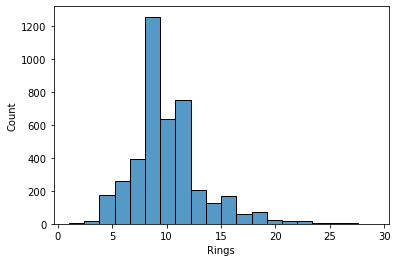

In [14]:
sns.histplot(df['Rings'],bins=20)

<AxesSubplot:xlabel='Whole weight', ylabel='Density'>

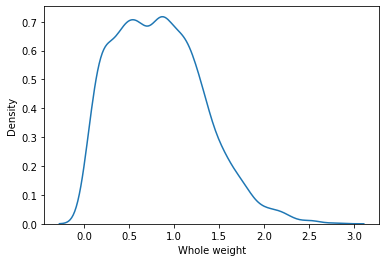

In [15]:
sns.kdeplot(df['Whole weight'])

<AxesSubplot:xlabel='Shell weight', ylabel='Height'>

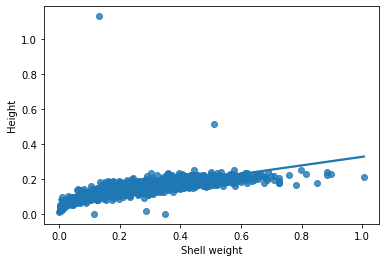

In [16]:
sns.regplot(x="Shell weight", y='Height', data=df)

<AxesSubplot:xlabel='Rings', ylabel='Diameter'>

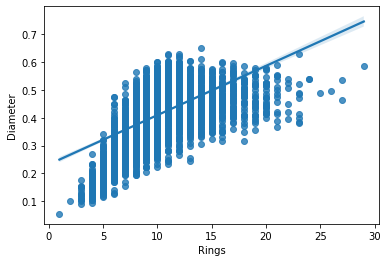

In [17]:
sns.regplot(x='Rings', y='Diameter', data=df)

<AxesSubplot:xlabel='Whole weight', ylabel='Diameter'>

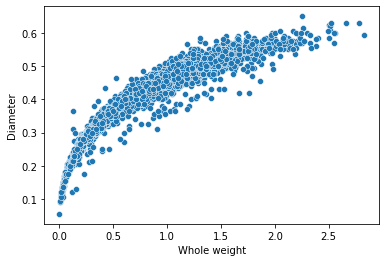

In [18]:
sns.scatterplot(x='Whole weight', y='Diameter', data=df)

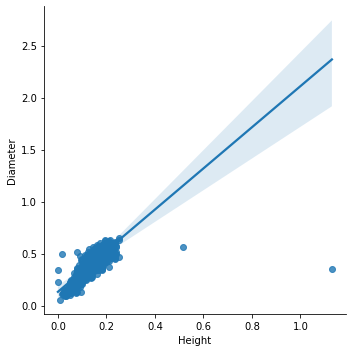

In [19]:
sns.lmplot(x='Height', y='Diameter', data=df)

In [20]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

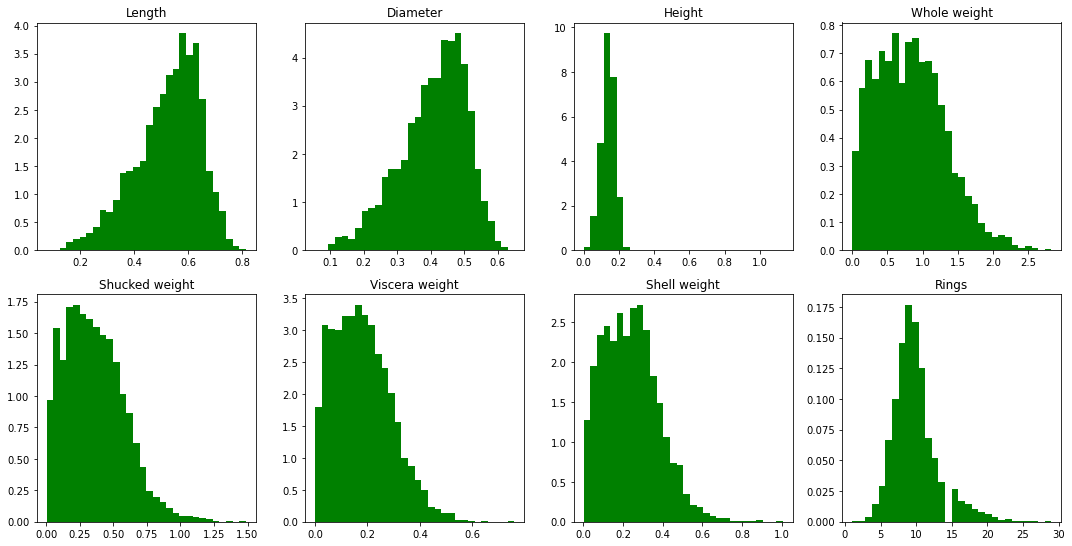

In [21]:
Abalone_df=df.drop(["Sex"],axis=1)
plt.rcParams['figure.figsize'] = (15,15)
Abalone_df.hist(bins=30, color='green', density=True, label='Value', histtype='stepfilled',layout=(4,4), grid=False)
plt.tight_layout()
plt.show()

In [22]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [23]:
df.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [24]:
df.corr()['Rings'].sort_values() #checking corr of quality with other columns

Shucked weight    0.420884
Viscera weight    0.503819
Whole weight      0.540390
Length            0.556720
Height            0.557467
Diameter          0.574660
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

<AxesSubplot:>

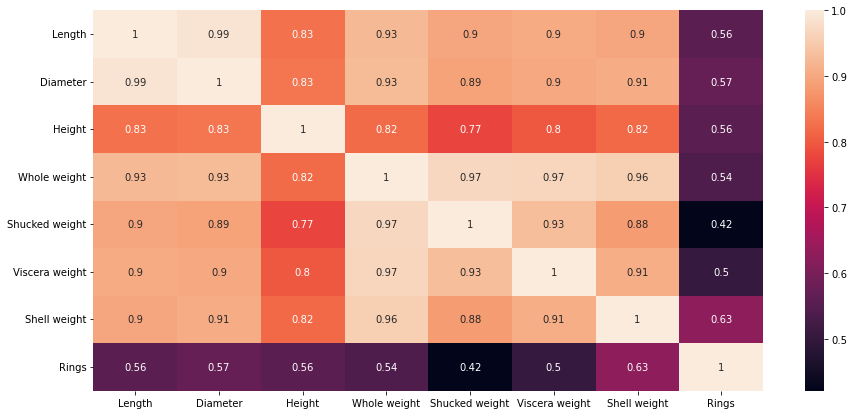

In [25]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)

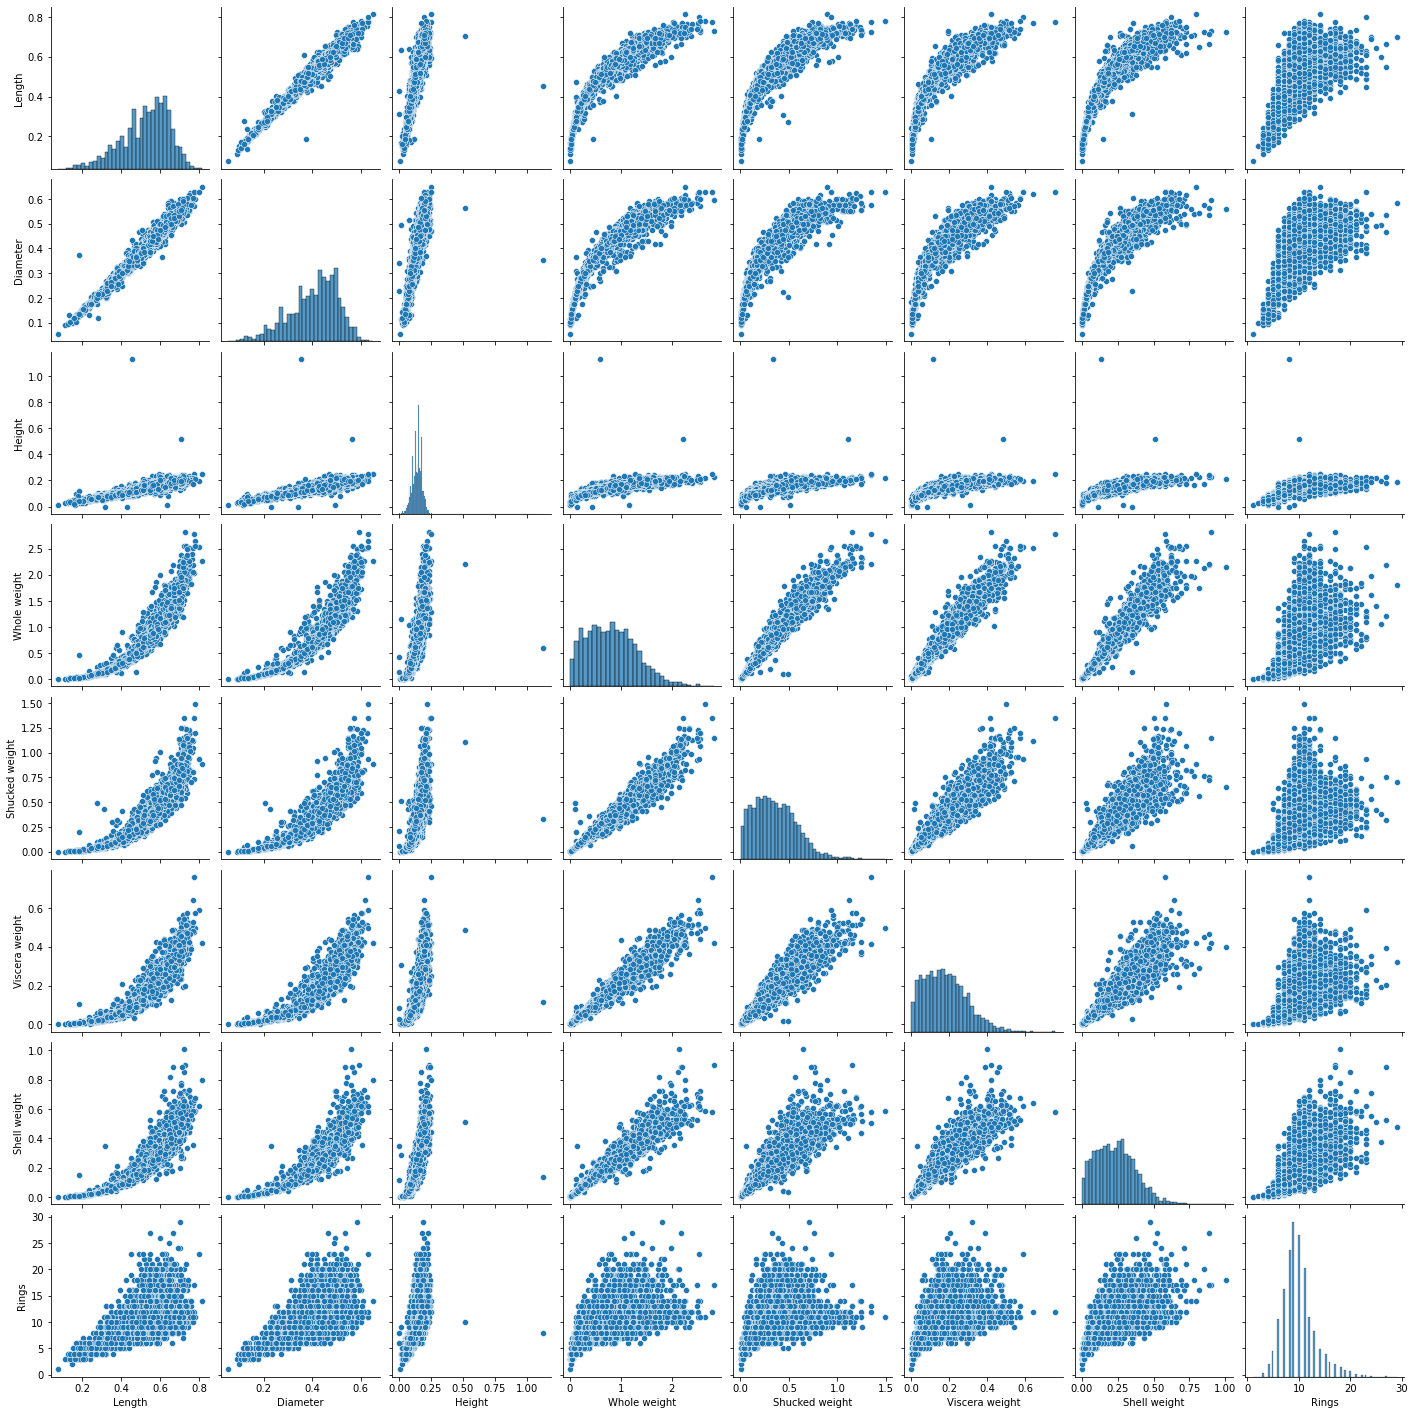

In [26]:
sns.pairplot(df)

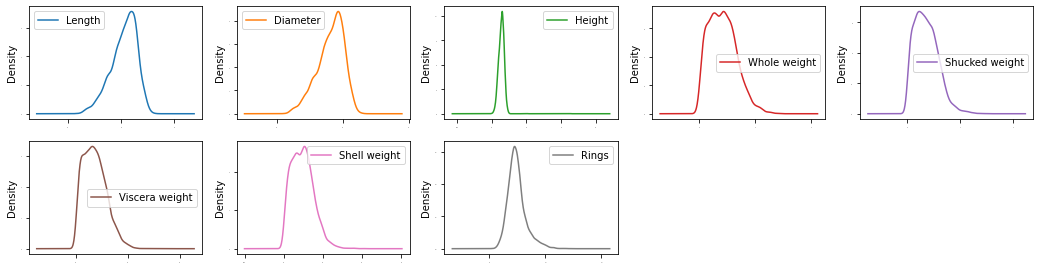

In [27]:
df.plot(kind='density',subplots=True,layout=(5,5),sharex=False,legend=True, fontsize=1,figsize=(18,12))
plt.show()

# Checking Outlier:

<AxesSubplot:ylabel='Rings'>

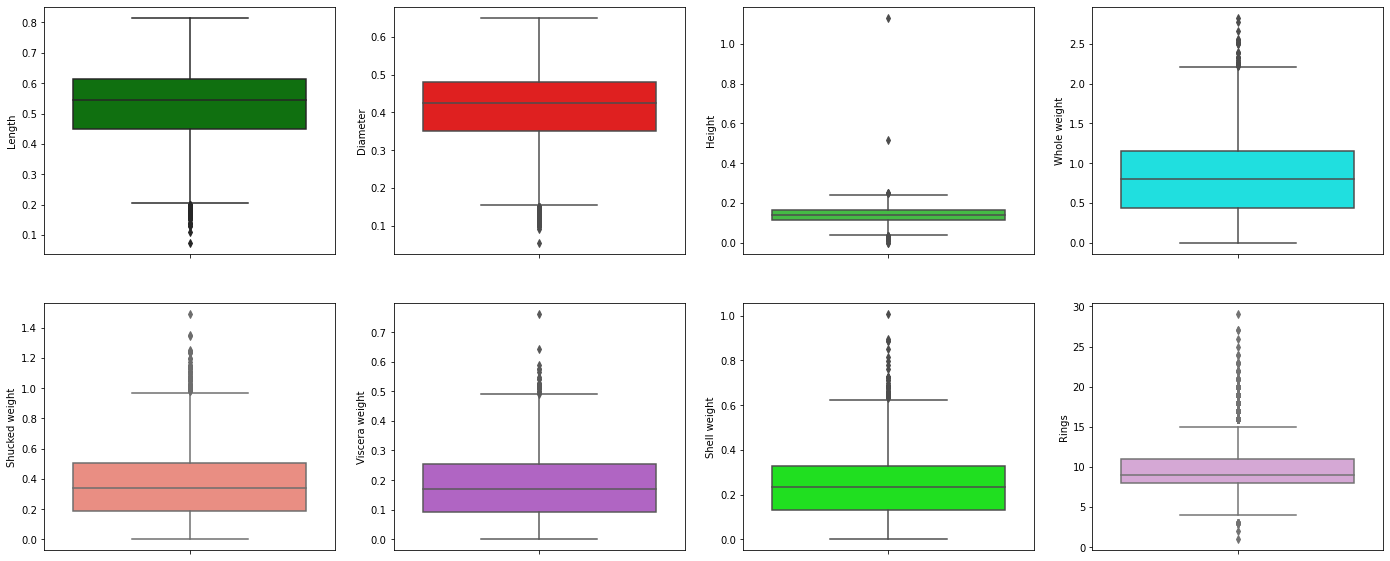

In [28]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(nrows= 2, ncols = 4, figsize = (24,10))
sns.boxplot(ax = ax1, y = 'Length', data = df, color = 'green')
sns.boxplot(ax = ax2, y = 'Diameter', data = df, color = 'red')
sns.boxplot(ax = ax3, y = 'Height', data = df, color = 'limegreen')
sns.boxplot(ax = ax4, y = 'Whole weight', data = df, color = 'cyan')
sns.boxplot(ax = ax5, y = 'Shucked weight', data = df, color = 'salmon')
sns.boxplot(ax = ax6, y = 'Viscera weight', data = df, color = 'mediumorchid')
sns.boxplot(ax = ax7, y = 'Shell weight', data = df, color = 'lime')
sns.boxplot(ax = ax8, y = 'Rings', data = df, color = 'plum')

We can see there are outliers in the data.

In [29]:
from scipy.stats import zscore
import numpy as np
DF_out=df.drop('Sex',axis=1)
z=np.abs(zscore(DF_out))
z

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.574558,0.432149,1.064424,0.641898,0.607685,0.726212,0.638217,1.571544
1,1.448986,1.439929,1.183978,1.230277,1.170910,1.205221,1.212987,0.910013
2,0.050033,0.122130,0.107991,0.309469,0.463500,0.356690,0.207139,0.289624
3,0.699476,0.432149,0.347099,0.637819,0.648238,0.607600,0.602294,0.020571
4,1.615544,1.540707,1.423087,1.272086,1.215968,1.287337,1.320757,0.910013
...,...,...,...,...,...,...,...,...
4172,0.341509,0.424464,0.609334,0.118813,0.047908,0.532900,0.073062,0.330765
4173,0.549706,0.323686,0.107991,0.279929,0.358808,0.309362,0.155685,0.020571
4174,0.632985,0.676409,1.565767,0.708212,0.748559,0.975413,0.496955,0.289624
4175,0.841182,0.777187,0.250672,0.541998,0.773341,0.733627,0.410739,0.020571


In [30]:
threshold=3
#index number
print(np.where(z>3))#returns index location of ouliers

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

In [31]:
len(np.where(z>3)[0])

200

In [32]:
z.iloc[891]

Length            1.715610
Diameter          1.885746
Height            2.163538
Whole weight      4.072271
Shucked weight    3.546658
Viscera weight    2.175218
Shell weight      4.728702
Rings             2.191933
Name: 891, dtype: float64

In [33]:
#to drop Outliers;
df_out_new=DF_out[(z<3).all(axis=1)]
print("old dataFrame",DF_out.shape)
print("new dataFrame",df_out_new.shape)
print("total dropped rows",DF_out.shape[0]-df_out_new.shape[0])

old dataFrame (4177, 8)
new dataFrame (4027, 8)
total dropped rows 150


In [34]:
Abalone=df.drop([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2624, 2625, 2709, 2710,
       2710, 2810, 2810, 2811, 2811, 2811, 2862, 2863, 2863, 2863, 3007,
       3008, 3140, 3148, 3149, 3149, 3151, 3151, 3188, 3193, 3280, 3359,
       3427, 3427, 3427, 3599, 3599, 3628, 3713, 3715, 3715, 3715, 3715,
       3800, 3837, 3899, 3899, 3902, 3924, 3930, 3944, 3961, 3962, 3996,
       4145, 4148], axis=0)

In [35]:
Abalone.shape

(4027, 9)

# Percentage data loss

In [36]:
loss_percent=(4177-4027)/4177*100
print(loss_percent,'%')

3.5910940866650707 %


In [37]:
#from sklearn.preprocessing import OrdinalEncoder
#enc=OrdinalEncoder()
##for i in Abalone.columns:
#    if Abalone[i].dtypes=="object":
#        Abalone[i]=enc.fit_transform(Abalone[i].values.reshape(-1,1))
        
#Abalone        

In [38]:
Abalone = pd.get_dummies(data=Abalone,columns=['Sex'])
Abalone

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


# SKEWNESS

In [39]:
x=Abalone.drop("Rings",axis=1)
y=Abalone["Rings"]

In [40]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Features"]=x.columns
vif_data["VIF Value"]=[variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
print(vif_data)

         Features   VIF Value
0          Length   39.165074
1        Diameter   40.852649
2          Height    6.591310
3    Whole weight  108.277063
4  Shucked weight   28.666881
5  Viscera weight   17.151153
6    Shell weight   23.503036
7           Sex_F   27.011268
8           Sex_I   24.955912
9           Sex_M   30.318435


In [41]:
x.drop(['Length','Shucked weight'],axis=1, inplace=True)

In [42]:
x

,Diameter,Height,Whole weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
0,0.365,0.095,0.5140,0.1010,0.1500,0,0,1
1,0.265,0.090,0.2255,0.0485,0.0700,0,0,1
2,0.420,0.135,0.6770,0.1415,0.2100,1,0,0
3,0.365,0.125,0.5160,0.1140,0.1550,0,0,1
4,0.255,0.080,0.2050,0.0395,0.0550,0,1,0
...,...,...,...,...,...,...,...,...
4172,0.450,0.165,0.8870,0.2390,0.2490,1,0,0
4173,0.440,0.135,0.9660,0.2145,0.2605,0,0,1
4174,0.475,0.205,1.1760,0.2875,0.3080,0,0,1
4175,0.485,0.150,1.0945,0.2610,0.2960,1,0,0


In [43]:
#from sklearn.preprocessing import power_transform
#x=power_transform(x,method='yeo-johnson')

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [44]:
pd.DataFrame(x).skew().sort_values(ascending=False)

Sex_F             0.821149
Sex_I             0.731618
Sex_M             0.576507
Viscera weight    0.437116
Shell weight      0.349471
Whole weight      0.334204
Height           -0.244251
Diameter         -0.598650
dtype: float64

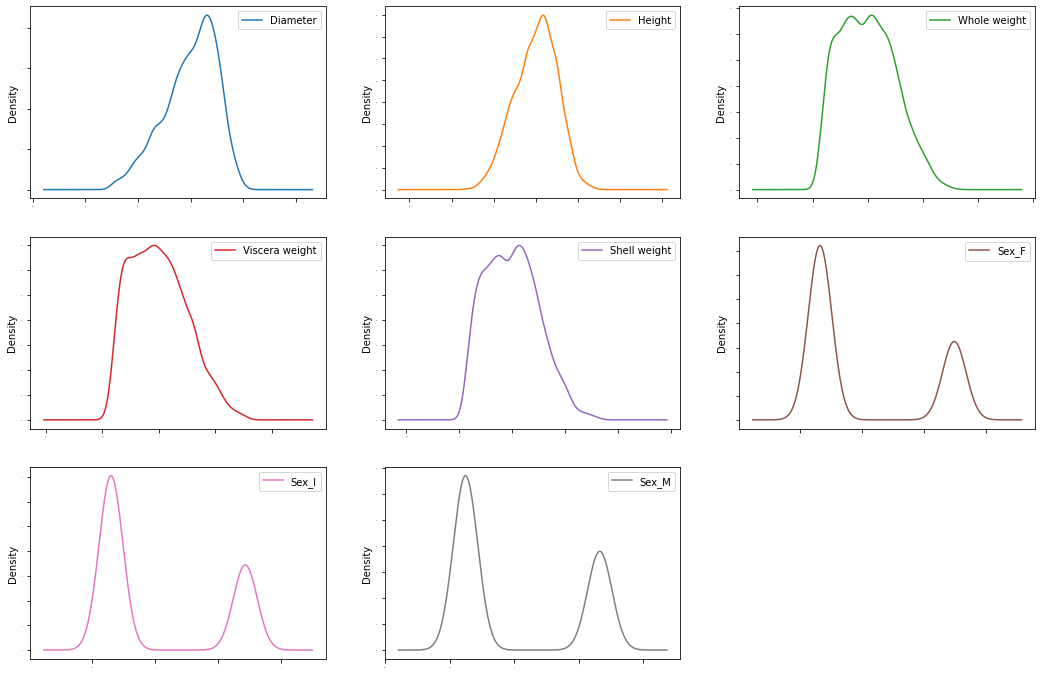

In [45]:
pd.DataFrame(x).plot(kind='density',subplots=True,layout=(3,3),sharex=False,legend=True, fontsize=1,figsize=(18,12))
plt.show()

# Modelling

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

# Finding Best Random State

In [62]:
maxAccu=0 #max accuracy
maxRS=0   #best random state value for which max accuracy is achieved

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)
    lm=LinearRegression()
    lm.fit(x_train, y_train)
    pred = lm.predict(x_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        

print("Best R2 score is", maxAccu,"at Random State",i)
print('At random state', i,'lm score is: ', round(lm.score(x_train, y_train),4))


Best R2 score is 0.5331328805551728 at Random State 999
At random state 999 lm score is:  0.478


In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=999)

Linear Regression

In [80]:
lr=LinearRegression()
lr.fit(x_train, y_train)
score=cross_val_score(lr,x,y,cv=7)
print(score)
print("CV Score",score.mean())
print('Tesing Score is: ', round(lm.score(x_test, y_test),4))


[0.37282856 0.43411211 0.08934668 0.50957235 0.44468025 0.43908245
 0.42505979]
CV Score 0.38781174235126314
Tesing Score is:  0.4372


Lasso Regression

In [81]:
ls=Lasso(alpha=.001)
ls.fit(x_train, y_train)
score=cross_val_score(ls,x,y,cv=7)
print(score)
print("CV Score",score.mean())
print('Tesing score is: ', round(ls.score(x_test, y_test),4))

[0.37229857 0.43334431 0.09204935 0.50942925 0.4446561  0.4390134
 0.42544965]
CV Score 0.3880343783247772
Tesing score is:  0.4375


Ridge Regression

In [82]:
rg=Ridge(alpha=1)
rg.fit(x_train, y_train)
score=cross_val_score(rg,x,y,cv=7)
print(score)
print("CV Score",score.mean())
print('Tesing score is: ', round(rg.score(x_test, y_test),4))

[0.37247545 0.43336924 0.09172144 0.5094468  0.44451219 0.4389437
 0.42558487]
CV Score 0.38800767111552553
Tesing score is:  0.4374


Random Forest Regressor

In [83]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train, y_train)
score=cross_val_score(rf,x,y,cv=7)
print(score)
print("CV Score",score.mean())
print('Tesing Score is: ', round(rf.score(x_test, y_test),4))

[0.35217896 0.53171754 0.08513525 0.47603788 0.47198642 0.46227596
 0.42355957]
CV Score 0.4004130816084441
Tesing Score is:  0.4672


AdaBoost Regressor

In [85]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()
ad.fit(x_train, y_train)
score=cross_val_score(ad,x,y,cv=7)
print(score)
print("CV Score",score.mean())
print('Tesing Score is: ', round(ad.score(x_test, y_test),4))

[ 0.51542271  0.28066731 -0.55137757  0.43403361  0.09756529  0.41957468
  0.09198305]
CV Score 0.18398129751257591
Tesing Score is:  0.3598


Decision Tree Regressor

In [86]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train, y_train)
score=cross_val_score(dtr,x,y,cv=7)
print(score)
print("CV Score",score.mean())
print('Tesing Score is: ', round(dtr.score(x_test, y_test),4))

[-0.0879928   0.17941332 -1.05268799  0.0569272   0.02805096  0.10246915
 -0.37248212]
CV Score -0.1637574677132539
Tesing Score is:  0.0642


Support Vector Regression

In [87]:
svr=SVR()
svr.fit(x_train, y_train)
score=cross_val_score(svr,x,y,cv=7)
print(score)
print("CV Score",score.mean())
print('Tesing Score is: ', round(svr.score(x_test, y_test),4))

[0.25960744 0.49169476 0.37378441 0.45244777 0.55314516 0.42880868
 0.50111175]
CV Score 0.4372285685429225
Tesing Score is:  0.4493


# Hyper Parameter Tuning

In [88]:
from sklearn.model_selection import GridSearchCV
model=SVR()
parameter={'kernel':['rbf','linear','poly'],'gamma':['auto','scale'],'C':[1,2,3,4,5],'degree':[1,2,3,4,5]}
grid=GridSearchCV(estimator=model,param_grid=parameter,cv=7)
grid.fit(x_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

GridSearchCV(cv=7, estimator=SVR(),
             param_grid={'C': [1, 2, 3, 4, 5], 'degree': [1, 2, 3, 4, 5],
                         'gamma': ['auto', 'scale'],
                         'kernel': ['rbf', 'linear', 'poly']})
0.4937357932197921
SVR(C=5, degree=1, gamma='auto')
{'C': 5, 'degree': 1, 'gamma': 'auto', 'kernel': 'rbf'}


In [92]:
Abalone_new= Abalone.copy()#creating the new data frame by reducing the classes to check if there is any increase in the accuracy score 
Abalone_new['Rings_1'] = np.where(Abalone['Rings'] <= 7,1,0)
Abalone_new['Rings_2'] = np.where(((Abalone['Rings'] > 7) & (Abalone['Rings'] <= 10)), 2,0)
Abalone_new['Rings_3'] = np.where(Abalone['Rings'] > 10,3,0)

Abalone_new['Cat_Rings'] = Abalone_new['Rings_1'] + Abalone_new['Rings_2'] + Abalone_new['Rings_3']

Abalone_new.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M,Rings_1,Rings_2,Rings_3,Cat_Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1,0,0,3,3
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1,1,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0,0,2,0,2
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1,0,2,0,2
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0,1,0,0,1


As we are getting less accuracy, we have splitted Rings into 3 groups and and tuned the model.

In [103]:
#predicting the features
xtrain = Abalone_new.drop(['Rings','Rings_1','Rings_2','Rings_3','Sex_F','Sex_I','Sex_M'], axis = 1)
ytrain = Abalone_new['Cat_Rings']
x_train, x_test, y_train, y_test = train_test_split(xtrain, ytrain, test_size=0.33, random_state=999)

from sklearn import svm
svmModel = svm.SVR(kernel='rbf', C=5,degree=1, gamma='auto') 
svmModel.fit(x_train, y_train)
y_pred = svmModel.predict(x_test)
result_acc = r2_score(y_test,y_pred) 
result_acc

0.9957436509534147

# Model Saving

In [106]:
import pickle
filename='Abalone.pkl'
pickle.dump(svmModel,open(filename,'wb'))

# Conclusion

In [105]:
import numpy as np
a=np.array(y_test)
#predicted=np.array(svr.predict(x_test))
df_com=pd.DataFrame({"original":a,"Predicted":y_pred},index=range(len(a)))
df_com

,original,Predicted
0,1,1.017115
1,3,2.935017
2,2,1.962681
3,3,2.952135
4,3,2.940056
...,...,...
1324,2,1.954357
1325,3,2.929864
1326,2,1.959705
1327,2,1.961110


# ROC AUC

In [ ]:
#AOC-ROC 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

svr=SVR()
svr.fit(x_train, y_train)
y_pred_prob=svr.predict_proba(x_test)

roc_auc_score(y_test,y_pred_prob,multi_class='ovr')